In this notebook we show trephine level cell type assignment

In [1]:
import os
from tqdm import tqdm
import spatialdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import sys
sys.path.append('..')
from configuration import STConfig
from wrappers.sdata_initalizer import SDataInitalizer
from wrappers.sdata_customizer import SDataCustomizer

from utils.utils_colors import cell_color_dict
from utils.utils_geom import align_sample_polygons

### Loading Configuration

In [2]:
cfg = STConfig()
meta_df = pd.read_csv(cfg.pth_meta_csv)
samples = meta_df['sample_key'].tolist()
print(f'Number of samples {len(samples)}')
print(samples)

Number of samples 32
['10693_R2', '10693_R1', '16832_R1', '16832_R2', '16818_R2', '16818_R1', '16818_R3', '18552_R3', '18552_R1', '18552_R2', '18550_R1', '18550_R3', '18550_R2', '18606_R2', '18606_R3', '18606_R1', '18599_R3', '18599_R1', '18599_R2', '18286_R3', '18286_R2', '18286_R1', '18256_R3', '18256_R1', '18256_R2', '18612_R1', '18612_R4', '18612_R2', '18612_R3', '18669_R3', '18669_R2', '18669_R1']


### Reading Cell Annotation 

In [3]:
# reading cell annotation 
skey = 'sample_id'
cell_type_col = 'obj.anno_3_w_megs_w_stromal'
annot_df = pd.read_csv(cfg.pth_cell_annotations_final)
annot_df[skey] = annot_df['cell_id'].str[-8:]
annot_df = annot_df.loc[:, [skey,'cell_id' ,cell_type_col]]
annot_df.head(2)

/tmp/slurm-1686751/ipykernel_3376071/3203295183.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv(cfg.pth_cell_annotations_final)


,sample_id,cell_id,obj.anno_3_w_megs_w_stromal
0,10693_R2,aaabbbkl-1_10693_R2,DC
1,10693_R2,aaabpmkp-1_10693_R2,Erythroid


### Visualizing Cell Boundaries coloured by Cell Types

0it [00:00, ?it/s]

Visualizing Manual Annotation for sample 16832_R1


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


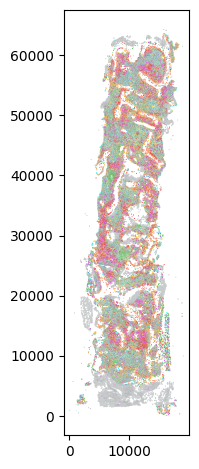

1it [16:03, 963.49s/it]

Visualizing Manual Annotation for sample 18256_R3


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


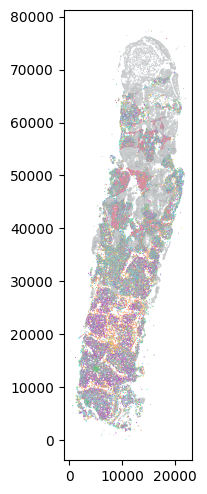

2it [25:57, 746.16s/it]

Visualizing Manual Annotation for sample 18256_R3


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


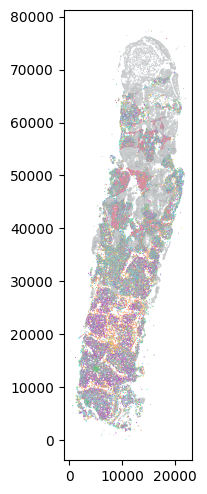

3it [35:34, 668.95s/it]

Visualizing Manual Annotation for sample 18552_R1


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


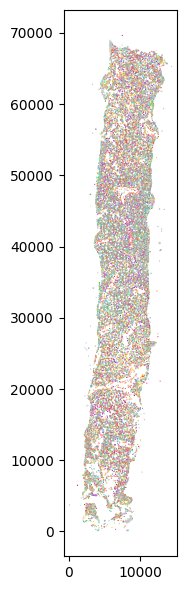

4it [38:19, 469.77s/it]

Visualizing Manual Annotation for sample 18550_R1


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


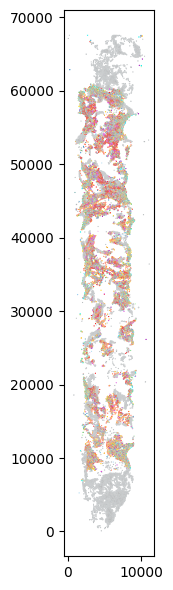

5it [40:08, 339.74s/it]

Visualizing Manual Annotation for sample 18669_R2


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


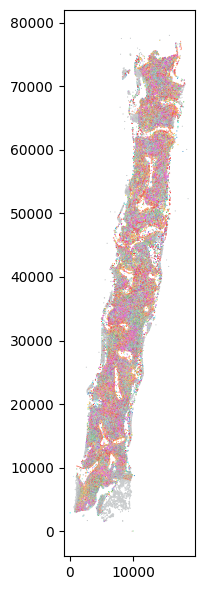

6it [48:37, 397.25s/it]

Visualizing Manual Annotation for sample 18286_R1


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


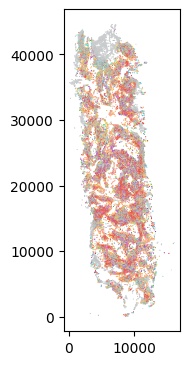

7it [53:05, 355.19s/it]

Visualizing Manual Annotation for sample 18256_R2


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


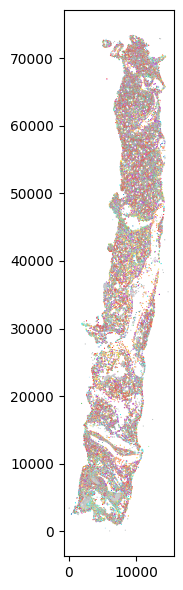

8it [58:02, 336.74s/it]

Visualizing Manual Annotation for sample 18606_R3


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


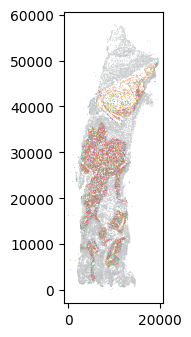

9it [1:00:03, 269.31s/it]

Visualizing Manual Annotation for sample 18552_R1


/tmp/slurm-1686751/ipykernel_3376071/3567659918.py:29: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plot_df.plot(


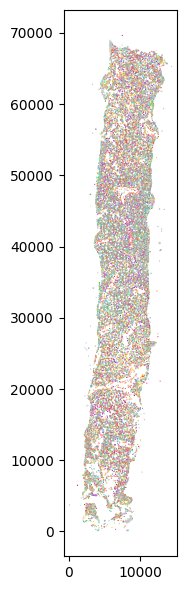

10it [1:02:25, 374.59s/it]


In [4]:
# To make notebook size managable we show only 3 random samples
N_samples = 10
samples = np.array(samples)
samples = list(samples[np.random.randint(0, len(samples), N_samples)])

figsize = (2, 6)   

cell_color_dict_rgb = {
    k: mcolors.to_rgba(v) 
    for k, v in cell_color_dict.items()
}

for idx, sample_id in tqdm(enumerate(samples)):
    print(f'Visualizing Manual Annotation for sample {sample_id}')
    customizer = SDataCustomizer(config=cfg, sample_key=sample_id)
    sdata_file_path = f'{cfg.pth_sdata}/{sample_id}_no_he.zarr'
    sdata_obj = spatialdata.read_zarr(sdata_file_path)

    gdf_cell_boundaries = sdata_obj['new_cell_boundaries'].copy()
    df_ctype = annot_df[annot_df[skey]==sample_id].copy()
    df_ctype.index = df_ctype['cell_id'].tolist()
    merged_df = gdf_cell_boundaries.merge(df_ctype, left_index=True, right_index=True)
    plot_df = merged_df[~merged_df[cell_type_col].isin(['CD69'])]
    plot_df = align_sample_polygons(plot_df)
    plot_df[cell_type_col] = plot_df[cell_type_col].fillna('Unknown')
           
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plot_df = plot_df.set_geometry("geometry_aligned")
    plot_df.plot(
        column = cell_type_col, 
        color = plot_df[cell_type_col].map(cell_color_dict_rgb),
        ax=ax
    )
    plt.tight_layout()
    plt.show()
